# Sequential Fashion Mnist

In [27]:
from __future__ import print_function 
import keras 
from keras.datasets import fashion_mnist 
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [28]:
# Number of classes

num_class = 10

In [29]:
batch_size = 128
epochs = 24

In [30]:
img_rows, img_cols = 28, 28

In [31]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [32]:
# Confirm works for any backend

In [33]:
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
    
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [34]:
# Rescale to 0 to 1

In [35]:
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [36]:
# Onehot the target

In [37]:
y_train = keras.utils.to_categorical(y_train, num_class)
y_test = keras.utils.to_categorical(y_test, num_class)

In [38]:
# Define Model

In [42]:
# model = Sequential()
# model.add(Conv2D(32, kernel_size = (3,3), padding = 'same' , activation = 'relu', input_shape = input_shape))
# # model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Conv2D(64, (3,3), activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Flatten())
# model.add(Dense(128, activation = 'relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_class, activation = 'softmax'))

In [75]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

In [76]:
# model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adadelta(), metrics = ['accuracy'])

In [77]:
# Alternative 
opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
y_train.shape

(60000, 10)

In [78]:
hist = model.fit(X_train, y_train, batch_size = batch_size, epochs = 15, verbose = 1, validation_data = (X_test, y_test))

Epoch 1/15
469/469 [==============================] - 28s 59ms/step - loss: 0.5771 - accuracy: 0.7883 - val_loss: 0.4195 - val_accuracy: 0.8477
Epoch 2/15
469/469 [==============================] - 29s 62ms/step - loss: 0.4044 - accuracy: 0.8557 - val_loss: 0.3630 - val_accuracy: 0.8691
Epoch 3/15
469/469 [==============================] - 29s 61ms/step - loss: 0.3555 - accuracy: 0.8727 - val_loss: 0.3312 - val_accuracy: 0.8819
Epoch 4/15
469/469 [==============================] - 30s 63ms/step - loss: 0.3202 - accuracy: 0.8837 - val_loss: 0.3065 - val_accuracy: 0.8865
Epoch 5/15
469/469 [==============================] - 28s 61ms/step - loss: 0.2970 - accuracy: 0.8927 - val_loss: 0.2938 - val_accuracy: 0.8918
Epoch 6/15
469/469 [==============================] - 33s 71ms/step - loss: 0.2785 - accuracy: 0.8986 - val_loss: 0.2767 - val_accuracy: 0.8977
Epoch 7/15
469/469 [==============================] - 32s 68ms/step - loss: 0.2614 - accuracy: 0.9043 - val_loss: 0.2752 - val_accuracy:

In [79]:
score = model.evaluate(X_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2588770091533661
Test accuracy: 0.9115999937057495


In [26]:
input_shape

(28, 28, 1)

In [58]:
hist.history

{'loss': [0.5792005062103271,
  0.39999571442604065,
  0.35085737705230713,
  0.3158182203769684,
  0.29385167360305786,
  0.27535879611968994,
  0.25986310839653015,
  0.2472003996372223,
  0.23387351632118225,
  0.22551006078720093,
  0.21626748144626617,
  0.20801730453968048],
 'accuracy': [0.7894333600997925,
  0.8567333221435547,
  0.874750018119812,
  0.8865666389465332,
  0.8936833143234253,
  0.8999999761581421,
  0.9060999751091003,
  0.9101499915122986,
  0.9148333072662354,
  0.9180999994277954,
  0.9216833114624023,
  0.9236500263214111],
 'val_loss': [0.3958064317703247,
  0.3509170413017273,
  0.3169567286968231,
  0.31480783224105835,
  0.290370374917984,
  0.2807731330394745,
  0.2810490131378174,
  0.2650679647922516,
  0.2618781328201294,
  0.2625995874404907,
  0.25463199615478516,
  0.2508392632007599],
 'val_accuracy': [0.8557000160217285,
  0.8734999895095825,
  0.8862000107765198,
  0.8841000199317932,
  0.8902999758720398,
  0.8999999761581421,
  0.900399982929

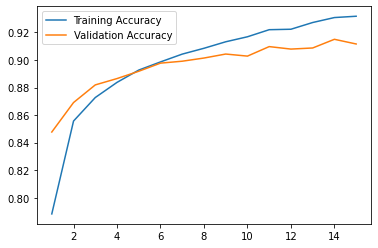

In [80]:
import numpy as np
import matplotlib.pyplot as plt

epoch_list = list(range(1, len(hist.history['accuracy']) + 1 ))
plt.plot(epoch_list, hist.history['accuracy'], epoch_list, hist.history['val_accuracy'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()

# Transfer model

In [81]:


from tensorflow.keras.applications import VGG16

from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD

In [100]:
from skimage.transform import resize

In [101]:
def resize_all(x, shape = (48,48)):
    band_shape = x.shape
    x_resize = np.zeros(shape = (band_shape[0],shape[0],shape[1]))
    for i in range(band_shape[0]):
        x_resize[i] = resize(x[i], shape)
    return x_resize

In [102]:
def transform_input_vgg(x):
    x_vgg = np.array(x).reshape(-1,28,28)
    x_vgg = resize_all(x_vgg, (48,48))
    x_vgg = np.repeat(x_vgg[:, :, :, np.newaxis], 3, axis=3)
#    x_vgg = preprocess_input(x_vgg)
    return x_vgg

In [103]:
X_train_transformed = transform_input_vgg(X_train)
X_test_transformed = transform_input_vgg(X_test)


In [110]:
vgg_conv = VGG16(weights= 'imagenet' , include_top=False, input_shape=(48, 48, 3))

vgg_conv.trainable = False

# InceptionV3_base_model = InceptionV3(weights='imagenet', include_top=False ) #include_top=False excludes final FC layer
print('Inception v3 base model without last FC loaded')
#print(InceptionV3_base_model.summary())     # display the Inception V3 model hierarchy

# Define the layers in the new classification prediction 
x = vgg_conv.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)        # new FC layer, random init
predictions = Dense(num_class, activation='softmax')(x)  # new softmax layer

# Define trainable model which links input from the Inception V3 base model to the new classification prediction layers
model = Model(inputs=vgg_conv.input, outputs=predictions)

# print model structure diagram
print (model.summary())

# Option 1: Basic Transfer Learning
print ('\nPerforming Transfer Learning')
  #   Freeze all layers in the Inception V3 base model 
for layer in vgg_conv.layers:
    layer.trainable = False
#   Define model compile for basic Transfer Learning
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the transfer learning model to the data from the generators.  
# By using generators we can ask continue to request sample images and the generators will pull images from 
# the taraining or validation folders and alter them slightly
hist = model.fit(X_train_transformed, y_train, batch_size = batch_size, epochs = 15, verbose = 1, validation_data = (X_test_transformed, y_test))

# Save transfer learning model
# model.save('inceptionv3-transfer-learning.model')

Inception v3 base model without last FC loaded
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool

In [112]:
score = model.evaluate(X_test_transformed, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3508709669113159
Test accuracy: 0.8787999749183655


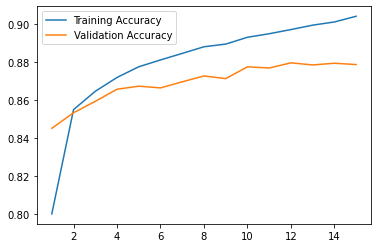

In [113]:
import numpy as np
import matplotlib.pyplot as plt

epoch_list = list(range(1, len(hist.history['accuracy']) + 1 ))
plt.plot(epoch_list, hist.history['accuracy'], epoch_list, hist.history['val_accuracy'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()